In [1]:
#import all the needed libiraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import Perceptron
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer

In [2]:
#read the csv file
df = pd.read_csv(r"D:/Fixed Solutions intern/Project1/train.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
#the shape before removing the rows of null values
df.shape

(550068, 12)

In [4]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
#all columns
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
#data type and non-null values of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
#the number of missing values of each coulmn
df.isnull().sum()/len(df)*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [8]:
#drop this column as it has a large number of missing values
df.drop(['Product_Category_3'], axis=1,inplace=True)

In [9]:
#drop rows with missing values
df.dropna(how='any', axis=0, inplace=True)

In [10]:
#After removing the column (Product_Category_3) and missing rows
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [11]:
#number of purchased products in category 2
df['Product_Category_2'].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [12]:
#the shape After removing the columns of null values
df.shape

(376430, 11)

In [13]:
#unique users
print(df["User_ID"].unique())
print("the number of unique users:", len(df["User_ID"].unique()))

[1000001 1000003 1000004 ... 1005146 1005174 1002584]
the number of unique users: 5891


In [14]:
#nique products
print(df["Product_ID"].unique())
print("number of unique products:",len(df["Product_ID"].unique()))

['P00248942' 'P00085442' 'P00193542' ... 'P00350742' 'P00060842'
 'P00057842']
number of unique products: 1803


In [15]:
user = df.drop_duplicates(subset='User_ID')

In [16]:
user['Gender'].value_counts(normalize=True)

M    0.717196
F    0.282804
Name: Gender, dtype: float64

array([<AxesSubplot:ylabel='Purchase'>], dtype=object)

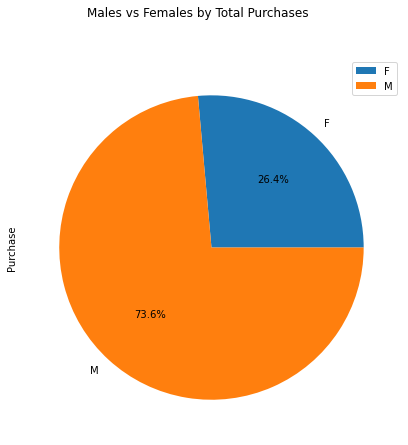

In [17]:
#visualize males and females by Total Purchases  
gender=user[['Gender','Purchase']].groupby('Gender').sum()
gender
gender.plot(kind='pie',autopct='%1.1f%%',subplots=True,figsize=(15,7),title='Males vs Females by Total Purchases')

<AxesSubplot:xlabel='Marital_Status'>

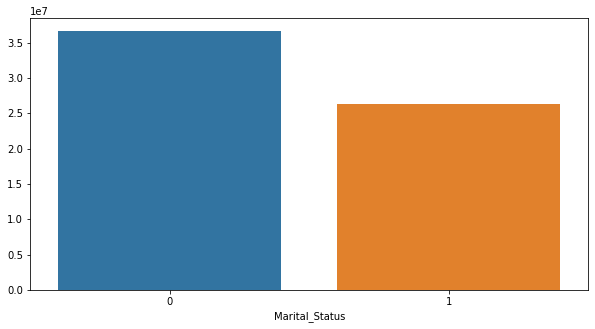

In [18]:
#visualize the marital status by total purchase
plt.figure(figsize= (10,5))
marital_status = user.groupby('Marital_Status')['Purchase'].sum()
marital_status
sns.barplot(x=marital_status.index, y= marital_status.values)

<AxesSubplot:xlabel='Occupation'>

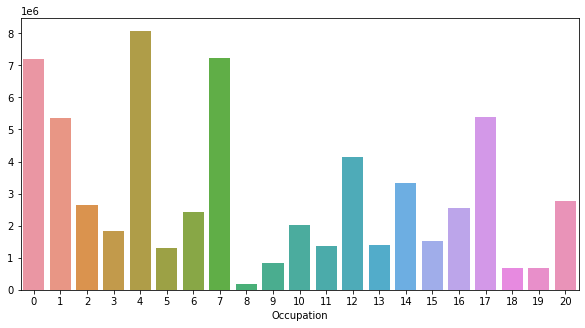

In [19]:
#visualize the total purchase by occupation
plt.figure(figsize= (10,5))
occupation = user.groupby('Occupation')['Purchase'].sum()
occupation
sns.barplot(x=occupation.index,y= occupation.values)

<AxesSubplot:xlabel='City_Category'>

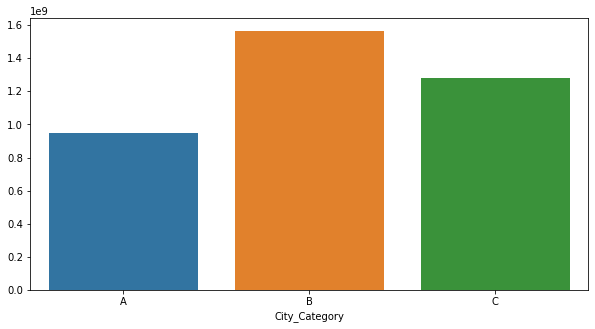

In [20]:
#visualize the total purchase by city
plt.figure(figsize= (10,5))
city_category = df.groupby('City_Category')['Purchase'].sum()
city_category
sns.barplot(x=city_category.index,y= city_category.values)

<AxesSubplot:xlabel='Age'>

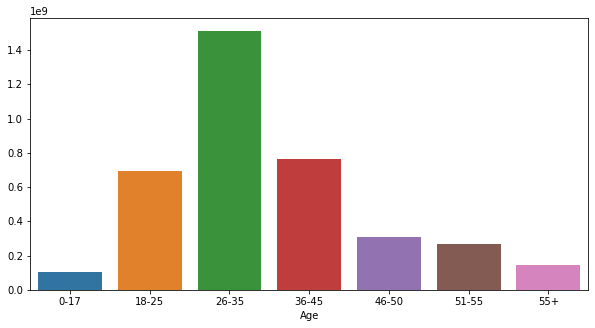

In [21]:
#visualize the total purchase by Age
plt.figure(figsize= (10,5))
age_groups = df.groupby('Age')['Purchase'].sum()
age_groups
sns.barplot(x=age_groups.index, y=age_groups.values)

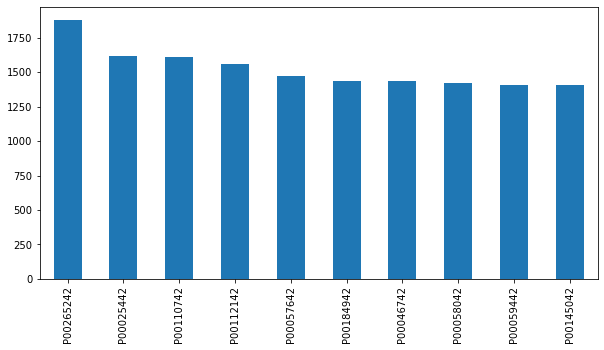

In [22]:
#top 10 product id 
plt.figure(figsize=(10,5))
df['Product_ID'].value_counts()[:10].plot(kind='bar');

In [23]:
#copy the data to make the model on it
df2=df.copy()

In [24]:
df2.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
User_ID,1.000000,-0.020844,0.020469,0.004232,0.001529,0.002258
Occupation,-0.020844,1.000000,0.024986,-0.010998,-0.000384,0.022216
Marital_Status,0.020469,0.024986,1.000000,0.017690,0.015138,-0.001174
Product_Category_1,0.004232,-0.010998,0.017690,1.000000,0.540583,-0.417752
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,-0.209918
Purchase,0.002258,0.022216,-0.001174,-0.417752,-0.209918,1.000000


In [25]:
df2.drop(['User_ID', 'Product_ID', 'City_Category'], axis=1, inplace=True)

In [26]:
df2['Gender'] = df2['Gender'].apply(lambda x: 1 if x == 'M' else (0 if x == 'F' else None))
a = {'0-17': 0, '18-25': 1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
df2['Age'] = df2['Age'].map(a)
b = {'1': 0, '2': 1, '3':2, '4+':3, '0':4}
df2['Stay_In_Current_City_Years'] = df2['Stay_In_Current_City_Years'].map(b)

In [27]:
#data types of the data
df2.dtypes

Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
dtype: object

In [28]:
df2.describe()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
count,376430.000000,376430.000000,376430.000000,376430.000000,376430.000000,376430.000000,376430.000000,376430.000000
mean,0.756847,2.481665,8.118399,1.531677,0.406309,4.238793,9.842329,10069.020833
std,0.428987,1.347318,6.504850,1.436569,0.491144,3.289190,5.086590,5186.631291
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,185.000000
25%,1.000000,2.000000,2.000000,0.000000,0.000000,1.000000,5.000000,6105.000000
50%,1.000000,2.000000,7.000000,1.000000,0.000000,4.000000,9.000000,8775.000000
75%,1.000000,3.000000,14.000000,3.000000,1.000000,6.000000,15.000000,15190.000000
max,1.000000,6.000000,20.000000,4.000000,1.000000,15.000000,18.000000,23961.000000


In [29]:
#applying RandomForestRegressor model
features = ['Gender', 'Marital_Status', 'Product_Category_1', 'Product_Category_2']

X = df2[features]
y = df2['Purchase']

normalized = Normalizer(norm = 'l1')
normalized = preprocessing.normalize(X)

X_train, X_test, y_train, y_test = train_test_split(normalized, y, test_size = 0.30, random_state = 100)

rfr = RandomForestRegressor()

rfr.fit(X_train, y_train)

y_predict_train= rfr.predict(X_train)
print("Accuracy:", r2_score(y_train, y_predict_train)*100)

y_predict_test = rfr.predict(X_test)
print("Accuracy:", r2_score(y_test, y_predict_test)*100)

Accuracy: 59.722791795385966
Accuracy: 59.72348462357729


In [30]:
df3 = df.copy()

In [31]:
df3['Gender'] = df3['Gender'].apply(lambda x: 1 if x == 'M' else (0 if x == 'F' else None))

In [32]:
df3.drop(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years', 'City_Category'], axis=1, inplace=True)

In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376430 entries, 1 to 545914
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Marital_Status      376430 non-null  int64  
 1   Product_Category_1  376430 non-null  int64  
 2   Product_Category_2  376430 non-null  float64
 3   Purchase            376430 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 14.4 MB


In [34]:
from sklearn.mixture import GaussianMixture

X_train, X_test, y_train, y_test = train_test_split(df3, y, test_size = 0.3, random_state = 100)

gmm = GaussianMixture(n_components=3)
gmm.fit(X_train)

labels = gmm.predict(X_train)
frame = pd.DataFrame(X_train)
frame['Purchase'] = labels
frame.columns = ['Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Purchase']

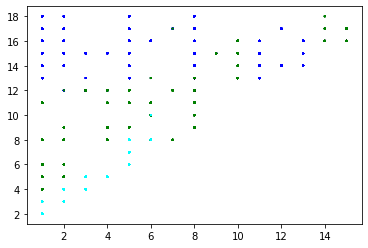

In [35]:
color=['blue','green','cyan', 'black']
for k in range(0,4):
    X_train = frame[frame["Purchase"]==k]
    plt.scatter(X_train["Product_Category_1"], X_train["Product_Category_2"], X_train["Marital_Status"], c=color[k])
plt.show()

In [36]:
df4 = df.copy()

In [37]:
df4['Gender'] = df4['Gender'].apply(lambda x: 1 if x == 'M' else (0 if x == 'F' else None))

In [38]:
df4.drop(['User_ID', 'Product_ID', 'Gender', 'Age', 'Marital_Status', 'Occupation', 'Stay_In_Current_City_Years', 'City_Category'], axis=1, inplace=True)

In [39]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376430 entries, 1 to 545914
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Product_Category_1  376430 non-null  int64  
 1   Product_Category_2  376430 non-null  float64
 2   Purchase            376430 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 11.5 MB


In [40]:
#training k-means model
from sklearn.cluster import KMeans

X_train, X_test, y_train, y_test = train_test_split(df4, y, test_size = 0.3, random_state = 100)

kmeans = KMeans(n_clusters=6)
kmeans.fit(X_train)

y_predict_train= kmeans.predict(X_train)
print("Accuracy:", r2_score(y_train, y_predict_train))

y_predict_test = kmeans.predict(X_test)
print("Accuracy:", r2_score(y_test, y_predict_test))

#predictions from kmeans
pred = kmeans.predict(X_train)
frame = pd.DataFrame(X_train)
frame['Purchase'] = pred
frame.columns = ['Product_Category_1', 'Product_Category_2', 'Purchase']

Accuracy: -3.762495006227682
Accuracy: -3.7768074791654422


In [41]:
#Accuracy of kmeans is negative